In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# URL of the dataset
url = "https://ies-python-midterm.s3.eu-central-1.amazonaws.com/companies/companies_no_subindustry.csv"

# Read the dataset into a pandas DataFrame
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
print(df.head())


  Symbol     Security  GICS_Sector                       hq    included  \
0    MMM           3M  Industrials    Saint Paul, Minnesota  09.08.1976   
1    AOS  A. O. Smith  Industrials     Milwaukee, Wisconsin  26.07.2017   
2    ABT       Abbott  Health Care  North Chicago, Illinois  31.03.1964   
3   ABBV       AbbVie  Health Care  North Chicago, Illinois  31.12.2012   
4   ABMD      Abiomed  Health Care   Danvers, Massachusetts  31.05.2018   

       Founded  
0         1902  
1         1916  
2         1888  
3  2013 (1888)  
4         1981  


In [18]:
# Count the number of missing values in the "included" column
missing_inclusion_dates = df['included'].isnull().sum()

# Display the number of companies with missing inclusion dates
print("Number of companies with missing inclusion dates:", missing_inclusion_dates)

Number of companies with missing inclusion dates: 45


In [19]:
# Drop rows with missing inclusion dates
df.dropna(subset=['included'], inplace=True)

# Convert the "included" column to datetime format
df['included'] = pd.to_datetime(df['included'], dayfirst=True, errors='coerce')

# Calculate the age of each company
current_date = pd.to_datetime('today')  # Assuming current date as today
df['age'] = (current_date - df['included']).dt.days

# Find the oldest and youngest constituent
oldest_constituent = df.loc[df['age'].idxmax()]
youngest_constituent = df.loc[df['age'].idxmin()]

# Calculate the average age of all constituents
average_age = df['age'].mean()

# Display results
print("Oldest Constituent:")
print(oldest_constituent)
print("\nYoungest Constituent:")
print(youngest_constituent)
print("\nAverage Age of Constituents:", average_age, "days")

Oldest Constituent:
Symbol                          MO
Security                    Altria
GICS_Sector       Consumer Staples
hq              Richmond, Virginia
included       1957-03-04 00:00:00
Founded                       1985
age                        24507.0
Name: 25, dtype: object

Youngest Constituent:
Symbol                        ACGL
Security        Arch Capital Group
GICS_Sector             Financials
hq               Hamilton, Bermuda
included       2022-11-01 00:00:00
Founded                       1995
age                          524.0
Name: 48, dtype: object

Average Age of Constituents: 8339.7010989011 days


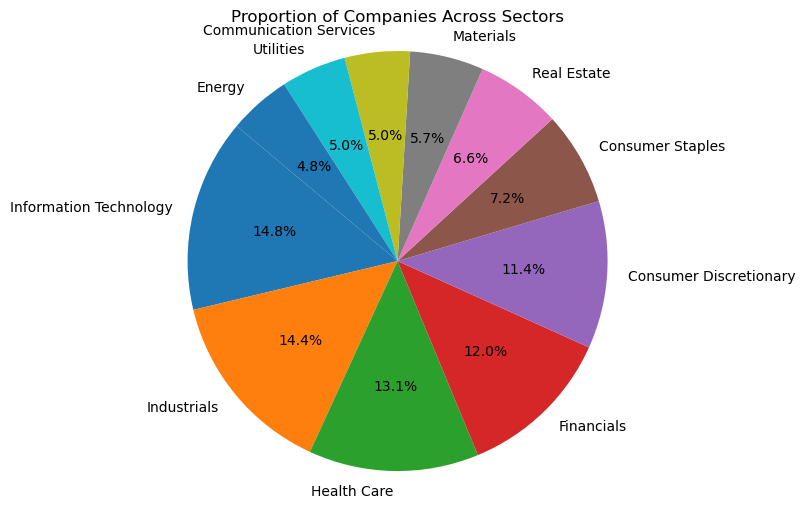

In [20]:
# Count the number of companies in each sector
sector_counts = df['GICS_Sector'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sector_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Companies Across Sectors')
plt.ylabel('')
plt.axis('equal') 
# Equal aspect ratio ensures that pie is drawn as a circle.

# Show plot
plt.show()

In [21]:
# Extract state from the "hq" column
df['hq_state'] = df['hq'].str.split(',').str[-1].str.strip()

# Describe the distribution of states
state_distribution = df['hq_state'].value_counts()

# Display the distribution
print("Distribution of States:")
print(state_distribution)

Distribution of States:
hq_state
California                    65
New York                      44
Texas                         41
Illinois                      31
Pennsylvania                  19
Massachusetts                 18
Ohio                          17
North Carolina                16
Georgia                       16
Florida                       15
New Jersey                    15
Virginia                      15
Connecticut                   13
Minnesota                     13
Washington                    12
Michigan                      10
Tennessee                      8
Colorado                       7
Ireland                        7
Indiana                        6
Wisconsin                      6
Missouri                       6
Arizona                        5
Maryland                       5
Nevada                         4
Oklahoma                       4
Rhode Island                   4
United Kingdom                 4
Switzerland                    3
Arkansas  

In [24]:
# URLs of the datasets
companies_url = "https://ies-python-midterm.s3.eu-central-1.amazonaws.com/companies/companies_no_subindustry.csv"
subindustry_url = "https://ies-python-midterm.s3.eu-central-1.amazonaws.com/companies/companies_subindustry.csv"

# Read the datasets into pandas DataFrames
companies_df = pd.read_csv(companies_url)
subindustry_df = pd.read_csv(subindustry_url)

# Perform inner join based on a common key
merged_df = pd.merge(companies_df, subindustry_df, on='Symbol', how='inner')

# Print column names of the merged DataFrame to identify the correct column names
print("Column names of the merged DataFrame:")
print(merged_df.columns)

Column names of the merged DataFrame:
Index(['Symbol', 'Security', 'GICS_Sector', 'hq', 'included', 'Founded',
       'subindustry'],
      dtype='object')


In [25]:
# Filter data for the "Consumer Discretionary" GICS sector
consumer_discretionary_df = merged_df[merged_df['GICS_Sector'] == 'Consumer Discretionary']

# Report on the distribution of subindustries
subindustry_distribution = consumer_discretionary_df['subindustry'].value_counts()

# Display the distribution
print("Distribution of Subindustries for the Consumer Discretionary GICS sector:")
print(subindustry_distribution)

Distribution of Subindustries for the Consumer Discretionary GICS sector:
subindustry
Specialty Stores                       6
Restaurants                            6
Hotels, Resorts & Cruise Lines         5
Internet & Direct Marketing Retail     5
Apparel, Accessories & Luxury Goods    4
Casinos & Gaming                       4
Homebuilding                           4
Automobile Manufacturers               3
General Merchandise Stores             3
Home Improvement Retail                2
Apparel Retail                         2
Distributors                           2
Automotive Retail                      2
Auto Parts & Equipment                 2
Leisure Products                       1
Consumer Electronics                   1
Home Furnishings                       1
Housewares & Specialties               1
Computer & Electronics Retail          1
Household Appliances                   1
Name: count, dtype: int64
